In [1]:
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
import geopandas as gpd

africa_rivers = gpd.read_file("../../Nature/rivers/data/rivers/samerica/a00000009.gdbtable")

print(africa_rivers)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0        60000001          0  60000001       0.97         0.0         6.5   
1        60000002          0  60000002       1.16         0.0         5.3   
2        60000003          0  60000003       3.37         0.0         7.2   
3        60000004          0  60000004       3.37         0.0         6.3   
4        60000005          0  60000005       3.07         0.0         7.9   
...           ...        ...       ...        ...         ...         ...   
1620958  61620959          0  61620959       1.72         0.0         5.4   
1620959  61620960          0  61620960       0.91         0.0         3.5   
1620960  61620961          0  61620961       1.72         0.0         4.2   
1620961  61620962          0  61620962       0.80         0.0         3.5   
1620962  61620963          0  61620963       2.57         0.0         4.2   

         CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  

In [3]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
brazil = df.loc[df['ADMIN'] == 'Venezuela']
africa_rivers = gpd.sjoin(africa_rivers, brazil)

In [4]:
africa_rivers = africa_rivers[['HYRIV_ID', 'NEXT_DOWN', 'MAIN_RIV', 'LENGTH_KM', 'DIST_DN_KM', 'DIST_UP_KM', 'CATCH_SKM', 'UPLAND_SKM', 'ENDORHEIC', 'DIS_AV_CMS', 'ORD_STRA', 'ORD_CLAS', 'ORD_FLOW', 'HYBAS_L12', 'Shape_Length', 'geometry']]
print(africa_rivers.columns.tolist())

['HYRIV_ID', 'NEXT_DOWN', 'MAIN_RIV', 'LENGTH_KM', 'DIST_DN_KM', 'DIST_UP_KM', 'CATCH_SKM', 'UPLAND_SKM', 'ENDORHEIC', 'DIS_AV_CMS', 'ORD_STRA', 'ORD_CLAS', 'ORD_FLOW', 'HYBAS_L12', 'Shape_Length', 'geometry']


In [5]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

country_shapefiles = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")
africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'South America']
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [6]:
africa_rivers = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 8]

In [7]:
import matplotlib.pyplot as plt

logo = plt.imread('../../Branding/light_logo_1.png')

In [8]:
basins = gpd.read_file("../../Nature/rivers/data/basins/samerica/hydrobasins_southam.shp")

In [9]:
import pandas as pd

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280', 
                  '#F6A600', '#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
                  '#222222']

print(len(colours_i_like))
colours_i_like = ['black', 'blue', '#808000', '#483d8b', '#dc143c',
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                  '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                  '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', 
                  '#ee82ee', '#A1CAF1', 'orange']

print(colours_i_like)
print(basins.MAJ_NAME.unique().tolist())

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

res = {}
for value, key in zip(colours_i_like, basins.MAJ_NAME.unique().tolist()):
    res[key] = value
    
print(res)

25
['black', 'blue', '#808000', '#483d8b', '#dc143c', '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff', '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', '#ee82ee', '#A1CAF1', 'orange']
['Caribbean Coast', 'Magdalena', 'Orinoco', 'Northeast South America, South Atlantic Coast', 'Amazon', 'Tocantins', 'North Brazil, South Atlantic Coast', 'Parnaiba', 'East Brazil, South Atlantic Coast', 'Sao Francisco', 'Uruguay - Brazil, South Atlantic Coast', 'La Plata', 'North Argentina, South Atlantic Coast', 'South America, Colorado', 'Negro', 'South Argentina, South Atlantic Coast', 'Central Patagonia Highlands', 'Colombia - Ecuador, Pacific Coast', 'Peru, Pacific Coast', 'North Chile, Pacific Coast', 'South Chile, Pacific Coast', 'La Puna Region', 'Salinas Grandes', 'Mar Chiquita', 'Pampas Region']
{'Caribbean Coast': 'black', 'Magdalena': 'blue', 'Orinoco': '#808000', 'Northeast South America, South Atlantic C

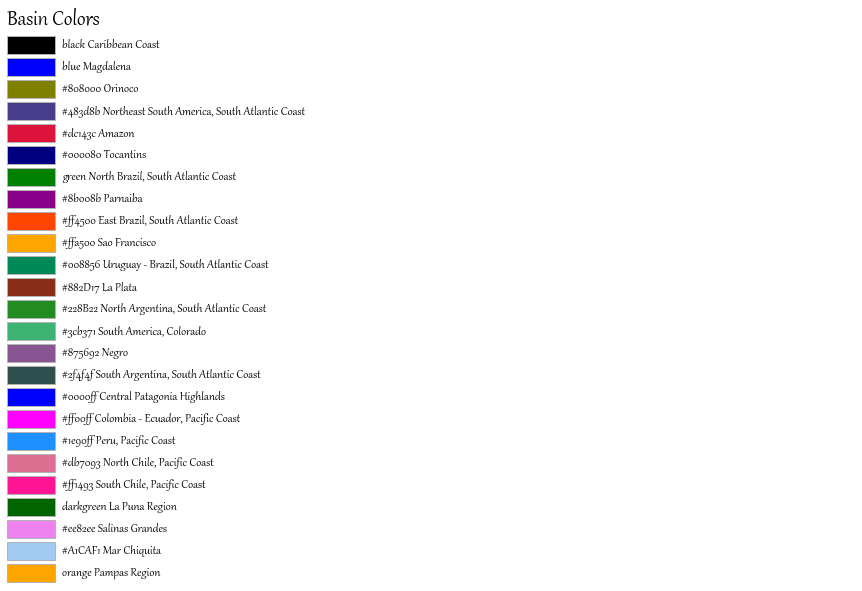

In [10]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


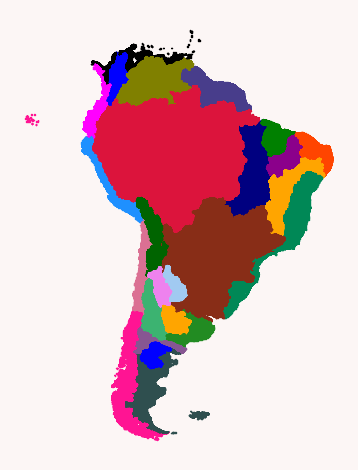

In [11]:
basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/samerica2.png", dpi=600, bbox_inches='tight')

In [12]:
print(basins.columns)

Index(['SUB_BAS', 'TO_BAS', 'MAJ_BAS', 'MAJ_NAME', 'SUB_NAME', 'SUB_AREA',
       'MAJ_AREA', 'LEGEND', 'geometry', 'basin', 'colors'],
      dtype='object')


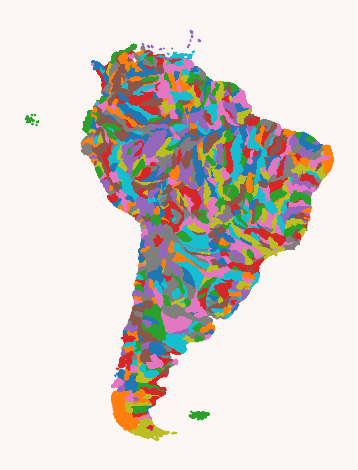

In [13]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='SUB_NAME', edgecolor='face')
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/samerica2.png", dpi=600, bbox_inches='tight')

In [14]:
rivers_basins = gpd.sjoin(africa_rivers, basins, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [24]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float, max_value: float):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.04, max_value=1.8)

In [16]:
from shapely.ops import unary_union

x = unary_union(brazil.geometry.tolist())
y = x.boundary
samerica = gpd.GeoDataFrame(pd.DataFrame({'name': ['brazil']}), crs="EPSG:4326", geometry=[y])

In [17]:
print(rivers_basins.total_bounds)

[-73.39166667   0.64583333 -59.81458333  12.13125   ]


In [20]:
rivers_basins = rivers_basins.replace('black', 'purple')
rivers_basins = rivers_basins.replace('#ff00ff', 'purple')
rivers_basins = rivers_basins.replace('#808000', 'darkgreen')
rivers_basins = rivers_basins.replace('#483d8b', 'navy')
rivers_basins = rivers_basins.replace('#ff00ff', 'purple')

colors = rivers_basins['colors'].drop_duplicates()
MAJ_NAME = rivers_basins['MAJ_NAME'].drop_duplicates()
print(rivers_basins[['colors', 'MAJ_NAME']].drop_duplicates())


           colors                                       MAJ_NAME
289        purple                                Caribbean Coast
5038         blue                                      Magdalena
5863    darkgreen                                        Orinoco
22406        navy  Northeast South America, South Atlantic Coast
142055    #dc143c                                         Amazon


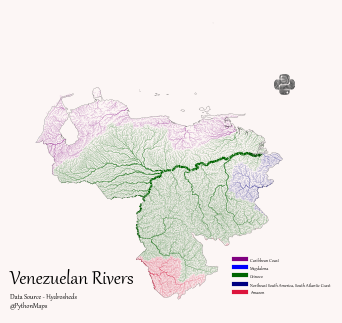

In [25]:

from matplotlib.lines import Line2D


fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
#africa_lakes.plot(ax=ax, color='#FCF6F5FF')
samerica.plot(ax=ax, color="black", lw=0.1)

newax = fig.add_axes([0.84, 0.56, 0.06, 0.06], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(-0.05, 0.1, "Venezuelan Rivers",
              size=16,
              color='black',
              transform = ax.transAxes)
txt = ax.text(-0.05, 0.02, "Data Source - Hydrosheds\n@PythonMaps",
              size=6,
              color='black',
              transform = ax.transAxes)

LegendElement = [Line2D([0],[0], color=color, lw=3, label=label) for color, label in zip(colors, MAJ_NAME)]
ax.legend(handles=LegendElement, fontsize=4, frameon=False, framealpha=0, bbox_to_anchor=(1.15, 0.2))

ax.axis('off')
plt.savefig("outputs/peru.jpeg", dpi=600, bbox_inches='tight')
plt.show()